In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

In [0]:
path = "/content/drive/My Drive/Study/DCU Semester 2/Data Analysis and Data mining/Continuous Assignment/InsideAirbnb/data/"
o_reviews = pd.read_csv(path+"reviews.csv", sep=",")

In [0]:
reviews = o_reviews

In [0]:
reviews.shape

(343299, 6)

# Data Pre-Processing and EDA
Data Preparation from CRISP-DM <br/>
Data pre-processing involves:
- data cleaning (Fill in missing values, Identify outliers , noisy data, Transformations)

- data integration and transformation
- data reduction
- discretization and generalization

In [0]:
print(reviews.shape)
print(reviews.dtypes)
reviews.head(1)

(343299, 6)
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,44077,203703,2011-03-20,393348,Christian,We enjoyed our stay very much. The room was co...


## Reviews Cleaning

### Dropping column

In [0]:
reviews = reviews.drop("reviewer_name", axis=1)
reviews.head(1)

,listing_id,id,date,reviewer_id,comments
0,44077,203703,2011-03-20,393348,We enjoyed our stay very much. The room was co...


### Data type

In [0]:
reviews.date = pd.to_datetime(reviews.date)
print (reviews.date.min())
print (reviews.date.max())
reviews.head(1)

2011-03-20 00:00:00
2020-03-21 00:00:00


,listing_id,id,date,reviewer_id,comments
0,44077,203703,2011-03-20,393348,We enjoyed our stay very much. The room was co...


In [0]:
reviews.dtypes

listing_id              int64
id                      int64
date           datetime64[ns]
reviewer_id             int64
comments               object
dtype: object

### Dealing with null and empty

In [0]:
# is empty ?
print(reviews.isnull().sum(axis = 0))
reviews.comments = reviews.comments.replace('', np.nan)

# isnull in comments ?
print(reviews.isnull().sum(axis = 0))
reviews.comments = reviews.comments.fillna("this is neutral") # Keeping empty reviews does not impact on our sentiment analysis. Thus we keep them

print(reviews.isnull().sum(axis = 0))

listing_id       0
id               0
date             0
reviewer_id      0
comments       138
dtype: int64
listing_id       0
id               0
date             0
reviewer_id      0
comments       138
dtype: int64
listing_id     0
id             0
date           0
reviewer_id    0
comments       0
dtype: int64


### Cleaning reviews comments

#### lowercase & onlywords

In [0]:
reviews.comments = reviews.comments.str.lower() # lower case
reviews.comments.replace({r"[^a-z ]" : ''}, inplace= True, regex = True) # only words
reviews.head(1)

,listing_id,id,date,reviewer_id,comments
0,44077,203703,2011-03-20,393348,we enjoyed our stay very much the room was com...


#### Only english comments

In [0]:
!pip install langid
import langid

index_toRemove = []

for ind, column in enumerate(reviews.comments):
  temp = langid.classify(column)
  res = temp[0]
  if (res != "en"):
    index_toRemove.append(ind)

reviews.drop(index_toRemove, axis=0, inplace=True) # remove rows by index id

     |████████████████████████████████| 1.9MB 42.0MB/s 
  Created wheel for langid: filename=langid-1.1.6-cp36-none-any.whl size=1941190 sha256=ed843711e0060f108446c9b8da9faef69de4f3455ee0dbe1806e370a6fb6397a
  Stored in directory: /root/.cache/pip/wheels/29/bc/61/50a93be85d1afe9436c3dc61f38da8ad7b637a38af4824e86e
Successfully built langid


In [0]:
reviews.shape

(297436, 5)

#### stopwords & redondant words

In [0]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords.words("english")
stopwordsList = stopwords.words('english')
reviews['comments_clean'] = reviews.comments.apply(lambda a_word: " ".join(i for i in a_word.split() if i not in stopwordsList)) # remove stopwords

# check most redundant words
w_toRemove = pd.Series(' '.join(reviews.comments_clean).split()).value_counts()[:15]
reviews.comments_clean = reviews.comments_clean.apply(lambda a_word: " ".join(i for i in a_word.split() if i not in w_toRemove)) # remove redundant words

w_toRemove

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


great        166167
stay         127514
place        126156
location     108953
dublin       102692
apartment     87824
clean         84821
us            80545
nice          71147
host          70818
would         68645
city          61609
recommend     60642
room          53396
good          53241
dtype: int64

#### Lemmatization

In [0]:
!pip install textblob
!python -m textblob.download_corpora

from textblob import Word
reviews.comments_clean = reviews.comments_clean.apply(lambda x: " ".join([Word(i).lemmatize() for i in x.split()]))
reviews.head()

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


,listing_id,id,date,reviewer_id,comments,comments_clean
0,44077,203703,2011-03-20,393348,we enjoyed our stay very much the room was com...,enjoyed much comfortable neat problem family h...
1,44077,211369,2011-03-28,444004,we have been here nights stay in a home is th...,night home best way improve englishvery lovely...
2,44077,234215,2011-04-21,465058,teresa and hughie were great hosts they were v...,teresa hughie host welcoming child comfotable ...
3,44077,261843,2011-05-13,490005,no surprises was as described very gracious h...,surprise described gracious neighborhood close...
4,44077,268148,2011-05-17,520460,teresa was a lovely hostess and we had a delig...,teresa lovely hostess delightful cottage descr...


In [0]:
print(reviews.isnull().sum(axis = 0))

listing_id        0
id                0
date              0
reviewer_id       0
comments          0
comments_clean    0
dtype: int64


In [0]:
toSave = "/content/drive/My Drive/Study/DCU Semester 2/Data Analysis and Data mining/Continuous Assignment/InsideAirbnb/data/reviews_clean.csv"
reviews.to_csv(toSave, sep=",", header = True, index = False)

# Sentiment Analysis

In [0]:
from textblob import TextBlob

reviews["polarity"] = reviews.comments_clean.apply(lambda x: TextBlob(x).sentiment[0] ) # sentiment[0] as we don't take subjectivity which is sentiment[1]
print("polarity = 1 = positive, polarity = -1 = negative, polarity = 0 = neutral")
reviews.polarity.head()

In [0]:
# import pandas as pd

# path = "/content/drive/My Drive/Study/DCU Semester 2/Data Analysis and Data mining/Continuous Assignment/InsideAirbnb/data/reviews_clean.csv"
# reviews = pd.read_csv(path, sep= ",")

reviews[["comments_clean", "polarity"]].head()

,comments_clean,polarity
0,enjoyed much comfortable neat problem family h...,0.233333
1,night home best way improve englishvery lovely...,0.650000
2,teresa hughie host welcoming child comfotable ...,0.280000
3,surprise described gracious neighborhood close...,0.000000
4,teresa lovely hostess delightful cottage descr...,0.428571


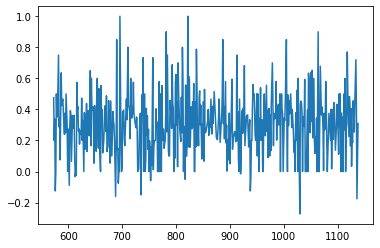

In [0]:
# first 1000 reviews
reviews.polarity.iloc[500:1000].plot()

In [0]:
reviews.head(1)

,listing_id,id,date,reviewer_id,comments,comments_clean,polarity
0,44077,203703,2011-03-20,393348,we enjoyed our stay very much the room was com...,enjoyed much comfortable neat problem family h...,0.233333


We can see very few negative prediction on the comments. <br/>
That's to be expected as we only use built-in algorithm to generate the polarity.
One point is from listing, many reviews are positive and a very few are negative.

# WordCloud

In [0]:
from wordcloud import WordCloud
#from PIL import Image
import matplotlib.pyplot as plt

## negative

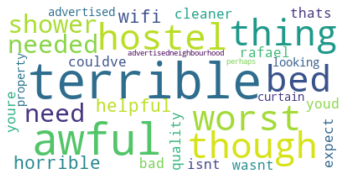

In [0]:
negative_polarity = reviews.loc[(reviews['polarity'] < -0.8 )]

# Put similar kind of review into 1 variable
negative_coms = " ".join(review for review in negative_polarity.comments_clean)

# create wordcloud
wordcloud = WordCloud(max_font_size=60, max_words=30, background_color="white").generate(negative_coms)

# print
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Positive

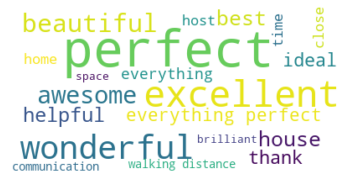

In [0]:
positive_polarity = reviews.loc[(reviews['polarity'] > 0.8 )]

# Put similar kind of review into 1 variable
positive_coms = " ".join(review for review in positive_polarity.comments_clean)

# create wordcloud
wordcloud = WordCloud(max_font_size=60, max_words=20, background_color="white").generate(positive_coms)

# print
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Neutral

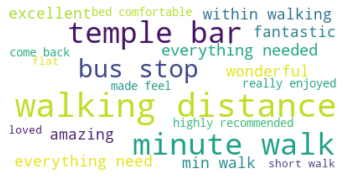

In [0]:
neutral_polarity = reviews.loc[(reviews['polarity'] > 0 ) & (reviews['polarity'] < 0.8 )]

# Put similar kind of review into 1 variable
neutral_coms = " ".join(review for review in neutral_polarity.comments_clean)

# create wordcloud
wordcloud = WordCloud(max_font_size=60, max_words=20, background_color="white").generate(neutral_coms)

# print
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From these wordclouds and assuming that a bad review equals bad rating: <br/>
Negative:
- non functional equipment : bathroom, cold water and such
- smell of the room
- no wifi
- bad matress
<br/><br/>
Positive:
- welcoming
- helpful (good communication)
- location (walking distance, proximity)
- space
<br/><br/>
Neutral:
- temple bar
- friendly, helpful
- walking distance
<br/><br/>
In conclusion, negative are mostly about disfonctions in the room while the host still seems to be helful in most case. Positive and neutral review are really similar and are focused on the location and the attitude of the host rather than the room. That is understandable as we will put more importance to relation than object.<br/>
The difference on neutral and positive would be the intensity of the welcoming. In neutral we can see temple bar, so we can assume that people didn't has much to say and included that it was convenient to go to temple bar from the lodge.


# Text Classification

In [0]:
# https://www.kaggle.com/tylerx/discover-sentiment-in-airbnb-reviews
import pandas as pd

path = "/content/drive/My Drive/Study/DCU Semester 2/Data Analysis and Data mining/Continuous Assignment/InsideAirbnb/data/reviews_clean.csv"
t_reviews = pd.read_csv(path, sep = ",")
t_reviews.head(1)

,listing_id,id,date,reviewer_id,comments,comments_clean,polarity
0,44077,203703,2011-03-20,393348,we enjoyed our stay very much the room was com...,enjoyed much comfortable neat problem family h...,0.233333


In [0]:
t_reviews.dtypes

listing_id          int64
id                  int64
date               object
reviewer_id         int64
comments           object
comments_clean     object
polarity          float64
dtype: object

In [0]:
t_reviews.shape

(297436, 7)

In [0]:
t_reviews.comments = t_reviews.comments.replace('', np.nan)
t_reviews.comments_clean = t_reviews.comments_clean.replace('', np.nan)
print(t_reviews.isnull().sum(axis = 0))

t_reviews.comments = t_reviews.comments.fillna("this is")
t_reviews.comments_clean = t_reviews.comments_clean.fillna("this is")
print(t_reviews.isnull().sum(axis = 0))

listing_id           0
id                   0
date                 0
reviewer_id          0
comments          1008
comments_clean    6543
polarity             0
dtype: int64
listing_id        0
id                0
date              0
reviewer_id       0
comments          0
comments_clean    0
polarity          0
dtype: int64


## Give label from polarity

In [0]:
temp = []

for rows in t_reviews.polarity:
    if (rows >= 0.5) : # positive
        temp.append("positive")
    elif (rows <= -0.5 ): # negative
      temp.append("negative")
    else: # neutral
      temp.append("neutral")

t_reviews["sentiment"] = temp

t_reviews.head()

,listing_id,id,date,reviewer_id,comments,comments_clean,polarity,sentiment
0,44077,203703,2011-03-20,393348,we enjoyed our stay very much the room was com...,enjoyed much comfortable neat problem family h...,0.233333,neutral
1,44077,211369,2011-03-28,444004,we have been here nights stay in a home is th...,night home best way improve englishvery lovely...,0.650000,positive
2,44077,234215,2011-04-21,465058,teresa and hughie were great hosts they were v...,teresa hughie host welcoming child comfotable ...,0.280000,neutral
3,44077,261843,2011-05-13,490005,no surprises was as described very gracious h...,surprise described gracious neighborhood close...,0.000000,neutral
4,44077,268148,2011-05-17,520460,teresa was a lovely hostess and we had a delig...,teresa lovely hostess delightful cottage descr...,0.428571,neutral


In [0]:
t_reviews.loc[t_reviews['sentiment'] == "negative"]

,listing_id,id,date,reviewer_id,comments,comments_clean,polarity,sentiment
2153,261248,526016512,2019-09-08,287045524,great ill visit once again if i am there,ill visit,-0.500000,negative
2155,261248,529764879,2019-09-15,28391050,the place was as described but unfortunately i...,described unfortunately noisy could hear door ...,-0.500000,negative
2378,266856,447365988,2019-05-03,259461563,too bad to mention,bad mention,-0.700000,negative
12754,1332458,474421252,2019-06-23,243654068,wouldnt stay there again over priced and dirty...,wouldnt priced dirty seemed lady ruined birthd...,-0.600000,negative
14964,1754515,411666882,2019-02-13,34123871,misses darker curtains and was a bit cold in t...,miss darker curtain bit cold appartement,-0.600000,negative
...,...,...,...,...,...,...,...,...
294280,38385946,574360778,2019-12-08,246253382,me and my girlfriend stayed for two weeks the ...,girlfriend stayed two week add said included b...,-0.533333,negative
294635,38645199,603545187,2020-02-09,331335725,great air bnb in a bit of a weird location but...,air bnb bit weird close walk tourist attraction,-0.500000,negative
296549,40394483,577927228,2019-12-16,218047119,great host parking annoying have to pay every...,parking annoying pay every hour,-0.800000,negative
296634,40532485,588926685,2020-01-05,315571035,floor is quite dirty and dusty,floor quite dirty dusty,-0.500000,negative


In [0]:
toSave = "/content/drive/My Drive/Study/DCU Semester 2/Data Analysis and Data mining/Continuous Assignment/InsideAirbnb/data/reviewsToR.csv"
t_reviews.to_csv(toSave, sep=",", header = True, index = False)